In [12]:
def video(fname, mimetype):
    from IPython.display import HTML
    video_encoded = open(fname, "rb").read().encode("base64")
    video_tag = '<video controls alt="test" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

* starts from the left, tries to kill at the edges
* because losing a life does not impose a penalty, it loses the life in exchange for some points. Can't really learn long-term rewards.

In [13]:
'./duel1/vid002110000/output_duel1_model_duel_vid04.mp4'

'./duel1/vid002110000/output_duel1_model_duel_vid04.mp4'

In [188]:
video('./duel1/vid002110000/output_duel1_model_duel_vid06.mp4','mp4')

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
import json
import pdb
import numpy as np
import os

In [146]:
def plot_rewards(filename, max_frames = 2500000, saveflag=True, outfolder='./pics', outfile=None):
    with open(filename) as jfile:
        res = json.load(jfile)
    num_frames = min(res['evalReward'][-1][0], max_frames)
    for loc in range(len(res['evalReward'])-1, -1, -1):
        if num_frames > res['evalReward'][loc][0]:
            break
    frames = [res['evalReward'][i][0]/1000000.0 for i in range(loc)]
    reward = [res['evalReward'][i][1] for i in range(loc)]
    std_plus = [res['evalReward'][i][1]+res['evalReward'][i][2] for i in range(loc)]
    std_minus = [res['evalReward'][i][1]-res['evalReward'][i][2] for i in range(loc)]
    plt.plot(frames,reward,'g')
    plt.plot(frames,std_plus,'r--')
    plt.plot(frames,std_minus,'r--')
    plt.xlabel('No. of Frames (million)')
    plt.ylabel('Average Reward')

    if saveflag:
        if outfile is None:
            outpath = os.path.join(outfolder,'.'.join(filename.split('/')[-1].split('.')[:-1] + ['eps']))
        else:
            outpath = os.path.join(outfolder, outfile)
        
        plt.savefig(outpath)

In [147]:
def plot_rewards_doub(filename, max_frames = 2500000, saveflag=True, outfolder='./pics', outfile=None):
    with open(filename) as jfile:
        res = json.load(jfile)

    num_frames = min(res['evalReward1'][-1][0], max_frames)
    for loc in range(len(res['evalReward1'])-1, -1, -1):
        if num_frames > res['evalReward1'][loc][0]:
            break

    frames = [res['evalReward1'][i][0]/1000000.0 for i in range(loc)]
    reward1 = [res['evalReward1'][i][1] for i in range(loc)]
    reward2 = [res['evalReward2'][i][1] for i in range(loc)]

#    std_plus = [res['evalReward'][i][1]+res['evalReward'][i][2] for i in range(len(res['evalReward']))]
#    std_minus = [res['evalReward'][i][1]-res['evalReward'][i][2] for i in range(len(res['evalReward']))]
    plt.plot(frames,reward1,'g')
    plt.plot(frames,reward2,'r')
  
#    plt.plot(frames,std_plus,'r--')
#    plt.plot(frames,std_minus,'r--')
    plt.xlabel('No. of Frames (million)')
    plt.ylabel('Average Reward')
    
    if saveflag:
        if outfile is None:
            outpath = os.path.join(outfolder,'.'.join(filename.split('/')[-1].split('.')[:-1] + ['eps']))
        else:
            outpath = os.path.join(outfolder, outfile)
        
        plt.savefig(outpath)

In [148]:
def plot_Q(filename, max_frames = 2500000, saveflag=True, outfolder='./pics', outfile=None):
    with open(filename) as jfile:
        res = json.load(jfile)
    num_frames = min(res['evalReward'][-1][0], max_frames)
    for loc in range(len(res['evalReward'])-1, -1, -1):
        if num_frames > res['evalReward'][loc][0]:
            break
    frames = [res['maxQ'][i][0]/1000000.0 for i in range(loc)]
    Q_value = [res['maxQ'][i][1] for i in range(loc)]
    plt.plot(frames,Q_value,'g')
    plt.xlabel('No. of Frames (million)')
    plt.ylabel('Average Q_value')
    
    if saveflag:
        if outfile is None:
            outpath = os.path.join(outfolder,'.'.join(filename.split('/')[-1].split('.')[:-1] + ['eps']))
        else:
            outpath = os.path.join(outfolder, outfile)
        
        plt.savefig(outpath)

In [186]:
def plot_Q_doub(filename, max_frames = 2500000, saveflag=True, outfolder='./pics', outfile=None):
    with open(filename) as jfile:
        res = json.load(jfile)
    num_frames = min(res['evalReward1'][-1][0], max_frames)
    for loc in range(len(res['evalReward1'])-1, -1, -1):
        if num_frames > res['evalReward1'][loc][0]:
            break
    frames = [res['maxQ1'][i][0]/1000000.0 for i in range(loc)]
    Q_value1 = [res['maxQ1'][i][1] for i in range(loc)]
    Q_value2 = [res['maxQ2'][i][1] for i in range(loc)]
    plt.plot(frames,Q_value1,'g')
    plt.plot(frames,Q_value2,'r')
    plt.xlabel('No. of Frames (million)')
    plt.ylabel('Average Q_value')
    
    if saveflag:
        if outfile is None:
            outpath = os.path.join(outfolder,'.'.join(filename.split('/')[-1].split('.')[:-1] + ['eps']))
        else:
            outpath = os.path.join(outfolder, outfile)
        
        plt.savefig(outpath)

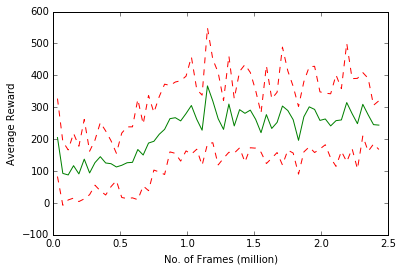

In [174]:
plot_rewards('./DQNq5/output_DQNq5_model_conv_res.json', saveflag=True, outfile='q5_reward')

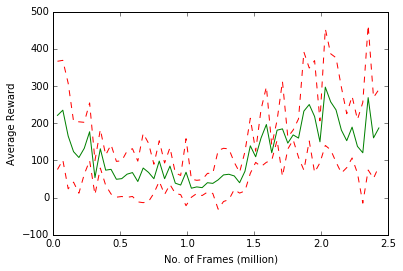

In [175]:
plot_rewards('./LINq3/output_LINq3_model_linear_res.json', outfile='q3_reward')

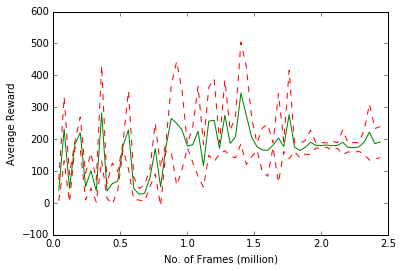

In [176]:
plot_rewards('./LINq2/output_LINq2_model_linear_res.json', outfile='q2_reward')

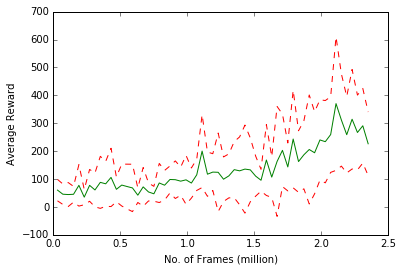

In [177]:
plot_rewards('./duel1/output_duel1_model_duel_res.json', outfile='q7_reward')

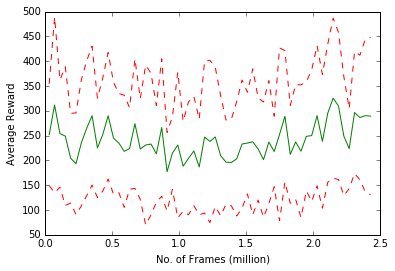

In [178]:
plot_rewards('./ddqn1/output_ddqn1_model_conv_res.json', outfile='q6_reward')

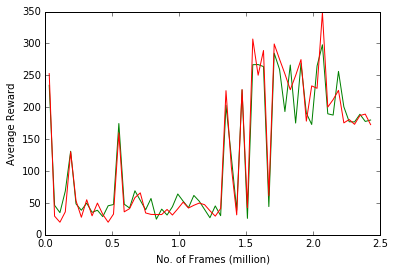

In [179]:
plot_rewards_doub('./doubqn/output_doubqn_model_linear_res.json', outfile='q4_reward')

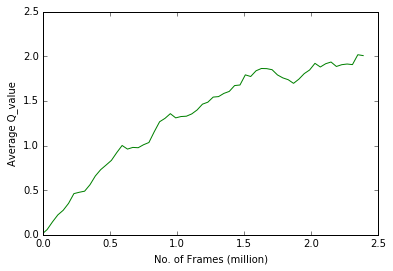

In [180]:
plot_Q('./DQNq5/output_DQNq5_model_conv_res.json', outfile='q5_Q')

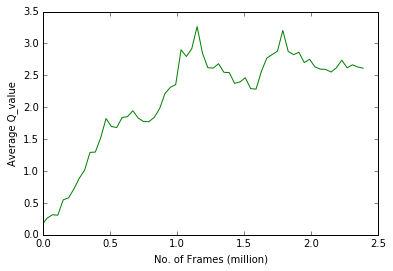

In [181]:
plot_Q('./LINq3/output_LINq3_model_linear_res.json', outfile='q3_Q')

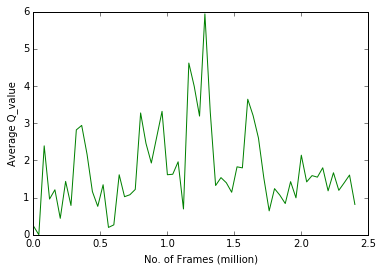

In [182]:
plot_Q('./LINq2/output_LINq2_model_linear_res.json', outfile='q2_Q')

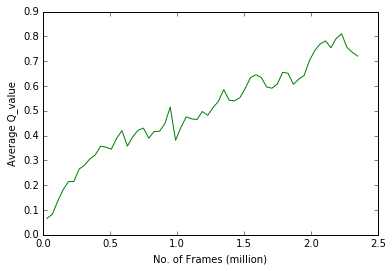

In [183]:
plot_Q('./duel1/output_duel1_model_duel_res.json', outfile='q7_Q')

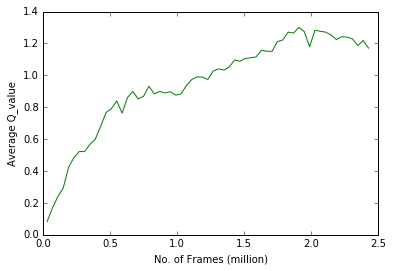

In [184]:
plot_Q('./ddqn1/output_ddqn1_model_conv_res.json', outfile='q6_Q')

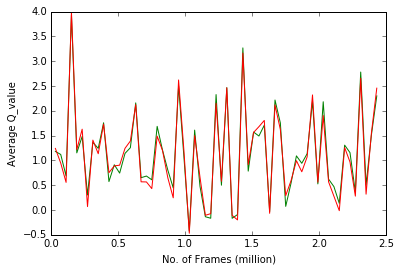

In [187]:
plot_Q_doub('./doubqn/output_doubqn_model_linear_res.json', outfile='q4_Q')

In [160]:
ab = './DQNq5/output_DQNq5_model_conv_res.json'

In [114]:
os.path.join('abc','.'.join(ab.split('/')[-1].split('.')[:-1] + ['eps']))

'abc/output_DQNq5_model_conv_res.eps'